In [13]:
from settings import *

In [14]:
qubits = TriangularLayoutA(m=m, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

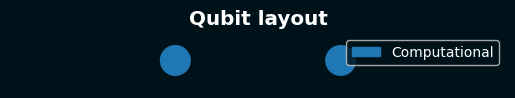

In [15]:
qubits.show_layout()

In [16]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=500)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=10540
-----
        Grad calculation time: 
        177.78985404968262 
        Armijo calculation time: 
        13.66168737411499 
        Total grad descend time: 
        3:11.45


In [17]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [18]:
theta_opt

array([0.97011672, 1.10877385, 1.19308   , 0.71701403, 1.13540682,
       0.9797619 , 0.89487303, 0.90836768, 1.02246923, 0.88935046,
       1.05894328, 0.99720378, 0.94902761, 1.033847  , 1.1542478 ,
       1.11814167, 0.87433621, 1.22658788, 1.00865873, 1.07695456,
       0.8554587 , 0.98484017, 1.08101134, 0.77343255, 0.95106328,
       0.95551697, 1.13598388, 0.96577936, 0.89653999, 1.14986332,
       0.83373284, 1.23210348, 0.79131599, 1.13104503, 0.984566  ,
       0.73121741, 1.23744713, 0.89527775, 0.89038512, 0.76805639,
       1.33598136, 1.0259283 , 0.67838387, 1.41454196, 0.98959232,
       1.12302571, 0.92061617, 1.18307572, 1.02412091, 0.85821293,
       1.28474507, 0.79267236, 0.92097099, 1.01850159, 0.94920709,
       0.95349261, 1.00180581, 0.94620383, 1.04761458, 1.21132875,
       1.23028419, 0.8516188 , 1.20165578, 1.10999563, 0.8416873 ,
       0.89363841, 0.97092478, 1.01655254, 0.83470156, 0.95790972])

In [19]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [20]:
ham = circuit(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-0.84386853-0.11608049j -0.32172607+0.3591571j  -0.10040042+0.14251558j
   0.01250362-0.10659483j]
 [-0.13934675-0.29040274j  0.73370192-0.0247369j  -0.19273352+0.10927809j
   0.15787563-0.53226469j]
 [-0.27673048-0.04400831j  0.3638136 -0.09881385j -0.42867386-0.42750128j
  -0.16799528+0.62017575j]
 [ 0.21616695+0.2131087j  -0.27643772+0.10012879j -0.71073164-0.2210499j
  -0.28537288-0.43124557j]]

In [21]:
from q_channel_approx.physics_defns import create_hamiltonian
create_hamiltonian(system)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2 0.3 0. ]
 [0.2 0.  0.  0.3]
 [0.3 0.  0.  0.2]
 [0.  0.3 0.2 0.2]]

In [22]:
np.sum(ham.dot(ham.conj().T) - np.identity(2**m) )# check if unitary

(5.134781488891349e-16+0j)

rho_rand_haar: seed=81703


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

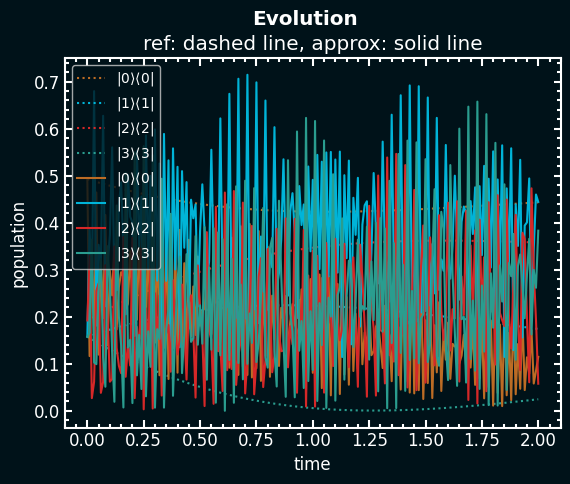

In [23]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(200, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.01, N=200, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

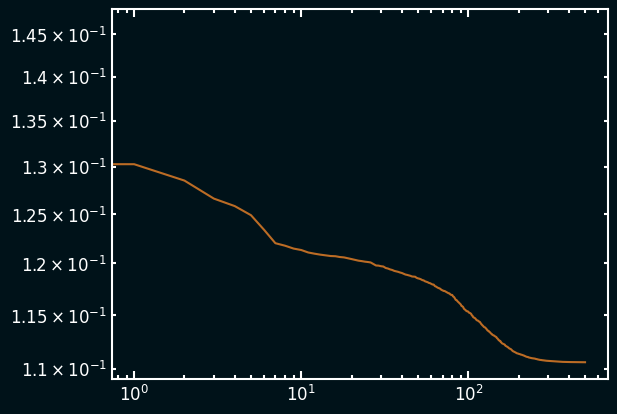

In [24]:
plt.loglog(errors)